In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import mrmr
from pymrmr import mRMR
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import mrmr
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import os.path
import json
from sklearn.metrics import auc, precision_recall_curve, average_precision_score
import pymrmr
from scipy.stats import kruskal, mannwhitneyu
from boruta import BorutaPy
import umap

# Import data

In [2]:
# import data from csv 
cnv = pd.read_csv('dataset_hg19/dataset/cnv.csv', sep=' ')

cnv.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SMIM9,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7
TCGA-3C-AALI,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
TCGA-3C-AALK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-4H-AAAK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5L-AAT1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-5T-A9QA,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
miRNA = pd.read_csv('dataset_hg19/dataset/mirna.csv', sep=' ')

miRNA.head()

,hsa-let-7a-1,hsa-let-7a-2,hsa-let-7a-3,hsa-let-7b,hsa-let-7c,hsa-let-7d,hsa-let-7e,hsa-let-7f-1,hsa-let-7f-2,hsa-let-7g,...,hsa-mir-941-3,hsa-mir-941-4,hsa-mir-942,hsa-mir-943,hsa-mir-944,hsa-mir-95,hsa-mir-96,hsa-mir-98,hsa-mir-99a,hsa-mir-99b
TCGA-3C-AALI,49201,98691,49035,148591,5095,3263,3566,133,41683,2231,...,0,0,52,0,4,8,383,547,1503,80378
TCGA-3C-AALK,57278,114320,57540,164553,18464,2114,8364,113,40723,2245,...,0,0,22,0,22,11,459,263,6620,152218
TCGA-4H-AAAK,67196,134563,67607,136918,20429,2162,10556,139,50848,2056,...,0,0,13,0,7,5,123,212,6666,158568
TCGA-5L-AAT1,94243,188921,94346,211457,21076,2657,12104,272,94610,3903,...,0,0,23,0,12,11,235,529,5352,196557
TCGA-5T-A9QA,49313,97721,49623,127544,2134,1769,8190,104,28306,2792,...,0,0,72,0,3,23,186,146,445,127728


In [4]:
mRNA = pd.read_csv('dataset_hg19/dataset/mrna.csv', sep=' ')

mRNA.head()

,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-3C-AALI,436.55,0,0,130.32,8,13924.87,290,1,0,1633,...,110,825,2470,365,1110,10123,2425,748,1704,0
TCGA-3C-AALK,461.69,0,0,151.08,4,26490.85,1224,0,0,1878,...,133,1058,2088,424,1468,13756,1888,1694,161,0
TCGA-4H-AAAK,631.87,1,9,362.77,8,22525.79,804,1,1,1925,...,115,997,2467,33,1823,9498,1955,2072,440,0
TCGA-5L-AAT1,259.26,0,0,125.12,5,18903.93,323,1,0,971,...,55,697,1213,66,630,5421,1732,698,71,0
TCGA-5T-A9QA,600.72,1,1,446.68,0,6084.91,787,7,0,1670,...,55,547,1548,4,615,6160,2132,843,7,0


In [5]:
proteins = pd.read_csv('dataset_hg19/dataset/proteins.csv', sep=' ')

proteins.head()

,14-3-3_beta,14-3-3_epsilon,14-3-3_zeta,4E-BP1,4E-BP1_pS65,4E-BP1_pT37_T46,4E-BP1_pT70,53BP1,A-Raf,A-Raf_pS299,...,p27_pT157,p27_pT198,p38_MAPK,p38_pT180_Y182,p53,p62-LCK-ligand,p70S6K,p70S6K_pT389,p90RSK,p90RSK_pT359_S363
TCGA-3C-AALI,-0.000752,0.022553,0.021112,0.101796,-0.382850,-0.108997,0.103860,-0.335720,0.139450,0.148123,...,-0.076626,-0.231296,-0.169884,0.040360,-0.043975,1.293687,0.783984,0.162565,-0.667649,-0.102581
TCGA-3C-AALK,-0.202252,0.077041,0.153997,0.299107,-0.438903,-0.460678,-0.358195,0.474016,0.376476,-0.160318,...,-0.219547,-0.340080,0.208381,0.365363,-0.136875,0.680809,0.612644,-0.131174,0.419210,-0.118623
TCGA-4H-AAAK,-0.208434,0.062566,0.034209,0.429696,-0.102852,-0.499466,-0.433138,0.143794,0.339525,-0.221161,...,-0.070647,-0.471717,-0.052702,0.068514,-0.080364,0.300677,0.819253,-0.520017,0.003252,-0.855659
TCGA-5L-AAT1,-0.465476,0.141845,0.232721,0.427772,-0.231596,0.276124,-0.411702,0.736283,0.398665,-0.063979,...,-0.145362,-0.582255,0.346637,0.289421,-0.225658,0.591818,0.623455,-0.559783,0.510494,-0.601296
TCGA-5T-A9QA,-0.354823,0.156575,0.249023,1.197526,0.447913,1.001215,0.307314,0.581762,0.316779,-0.085146,...,0.076588,-0.325001,0.166015,-1.064492,0.181296,-0.226434,0.842169,0.280629,0.524148,-0.500144


# Import label

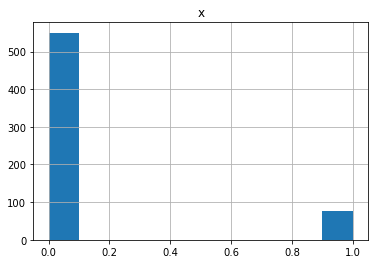

In [6]:
label = pd.read_csv('dataset_hg19/dataset/labels_pfi.csv', sep=' ')

label.hist()
plt.show()

# Check NaN values

In [7]:
def checkNaNValues(dataset):
    if dataset.isna().sum().sum() == 0:
        print(f"Non sono presenti dati NaN")
    else:
        for column in dataset:
            if dataset[column].isna().sum() == 0:
                print(f"Nella colonna {column} non sono presenti dati NaN")
            else:
                print(f"Nella colonna {column} sono presenti: {dataset[column].isna().sum()}")

In [8]:
checkNaNValues(cnv)

Non sono presenti dati NaN


In [9]:
checkNaNValues(mRNA)

Non sono presenti dati NaN


In [10]:
checkNaNValues(miRNA)

Non sono presenti dati NaN


In [11]:
checkNaNValues(proteins)

Non sono presenti dati NaN


# Normalize data

In [12]:
def dataNormalization(scaler, data):
    scl = scaler()
    model = scl.fit(data)
    scaled_data = model.transform(data)
    
    return pd.DataFrame(scaled_data, columns=data.columns, index=data.index)

# Filter feature with low variability

In [13]:
def filter_features_with_low_variability(data, alfa) -> pd.DataFrame:
    #Delete columns with standard deviation < alfa (0.10?)
    for column in data:
        if data[column].std() < alfa:
            #print(f'column: {column} has standard deviation < {alfa}, removed')
            data.drop(column, axis=1, inplace=True)
            
    return data

# Normalize and filter datasets

In [14]:
dataset_dict = {'cnv': cnv, 'miRNA': miRNA, 'mRNA': mRNA, 'proteins': proteins}

In [15]:
def create_data_normalized_filtered(data_dict, scaler, min_variance):
    dict_filtered_nornalize = {}
    for (key, value) in zip(data_dict, data_dict.values()):
        dict_filtered_nornalize[key] = filter_features_with_low_variability(dataNormalization(MinMaxScaler, value), 0.05)
    
    return dict_filtered_nornalize

In [16]:
filtered_normalize_data = create_data_normalized_filtered(dataset_dict, MinMaxScaler, 0.05)

In [17]:
#TO DO: su ogni dataset, genero i vari holdout e sui dati di training faccio
#feature selection e traino usando RandomForest
#usando 10 multiple holdout 
#misura di performance AUPRC, auc interne e poi media fuori 

#Feature seletion using multivariate (mrmr, maximum relevant minimum redundancy e boruta)
#mrmr piu' e' basso piu' la feature non ci interessa, piu' e' alto piu e' informativa

In [18]:
#UMAP 

In [19]:
#baseline AUPRC
len(label)/label[label['x'] == 1].count()/100

x    0.081429
dtype: float64

# Univariate feature selection using Kruskal-Wallis e Mann-Whitney

In [20]:
def create_dataframe_pos_neg(dataset, label):
    return (dataset[label['x']==1], dataset[label['x']==0])

In [21]:
def univariate_features_selection(dataset, label, univariate_tecnique, min_pValue):
    pos, neg = create_dataframe_pos_neg(dataset, label)
    H, pval = univariate_tecnique(pos, neg)
    mask = (pval < min_pValue)
    return dataset.columns[mask]

In [22]:
univariate_features_selection(filtered_normalize_data['proteins'], label, mannwhitneyu, 0.05)

Index(['A-Raf', 'Akt_pS473', 'Bcl-2', 'FASN', 'GSK3_pS9', 'Jak2', 'Ku80',
       'PRAS40_pT246', 'PREX1', 'Raptor', 'Shc_pY317', 'XRCC1', 'mTOR', 'p27',
       'p38_pT180_Y182'],
      dtype='object')

In [23]:
univariate_features_selection(filtered_normalize_data['proteins'], label, kruskal, 0.05)

Index(['A-Raf', 'Akt_pS473', 'Bcl-2', 'FASN', 'GSK3_pS9', 'Jak2', 'Ku80',
       'PRAS40_pT246', 'PREX1', 'Raptor', 'Shc_pY317', 'XRCC1', 'mTOR', 'p27',
       'p38_pT180_Y182'],
      dtype='object')

# Multivariate feature selection, mrmr and Boruta

In [25]:
def dataset_mrmr(dataset, n_feature):
    return dataset[mRMR(dataset, 'MIQ', n_feature)]

In [26]:
def execute_boruta_feature_selection(
    X_train: pd.DataFrame,
    y_train: np.ndarray,
    holdout_number: int,
    max_iter: int = 100,
):
    """Returns tuple with list of kept features and list of discared features.
    
    Parameters
    --------------------------
    X_train: pd.DataFrame,
        The data reserved for the input of the training of the Boruta model.
    y_train: np.ndarray,
        The data reserved for the output of the training of the Boruta model.
    holdout_number: int,
        The current holdout number.
    max_iter: int = 100,
        Number of iterations to run Boruta for.
    """

    model = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)
    
    boruta_selector = BorutaPy(
        model,
        n_estimators='auto',
        verbose=False,
        alpha=0.05,
        max_iter=max_iter, 
        random_state=42,
    )
    boruta_selector.fit(X_train.values, y_train.values.ravel())
    
    kept_features = list(X_train.columns[boruta_selector.support_])
    discarded_features = list(X_train.columns[~boruta_selector.support_])
    
    return kept_features, discarded_features

In [27]:
#kept, discarded = execute_boruta_feature_selection(filtered_normalize_data['cnv'], label, 3)

In [28]:
#filtered_normalize_data['proteins'][kept]

# Train

In [29]:
"""Because PR curves don’t use true negatives anywhere, the AUPRC won’t be “swamped” by a large proportion of true negatives in the data. You can use AUPRC on a dataset with 98% negative/2% positive examples, and it will “focus” on how the model handles the 2% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low. 
Ironically, AUPRC can often be most useful when its baseline is lowest, because there are many datasets with large numbers of true negatives in which the goal is to handle the small fraction of positives as best as possible."""

'Because PR curves don’t use true negatives anywhere, the AUPRC won’t be “swamped” by a large proportion of true negatives in the data. You can use AUPRC on a dataset with 98% negative/2% positive examples, and it will “focus” on how the model handles the 2% positive examples. If the model handles the positive examples well, AUPRC will be high. If the model does poorly on the positive examples, AUPRC will be low. \nIronically, AUPRC can often be most useful when its baseline is lowest, because there are many datasets with large numbers of true negatives in which the goal is to handle the small fraction of positives as best as possible.'

In [30]:
#baseline AUPRC
len(label)/label[label['x'] == 1].count()/100

x    0.081429
dtype: float64

In [31]:
def train_model(dataset, label, num_extenal_fold, type_feature_selection, min_pValue:None):
    
    """Return AUPRC score after training.
    
    Parameters
    --------------------------
    dataset: pd.DataFrame,
        The data reserved for the input of the training.
    label: pd.DataFrame,
        The data reserved for the output of the training.
    num_external_fold: int,
        The current holdout number.
    type_feature_selection: string,
        Type of feature selection: ['kruskal', 'mrmr', 'mannwhitneyu', 'boruta']
    min_pValue: int,
        Minimum value of p_value. Valid if type_feature_selection == 'kruskal' or 'mannwhitneyu'.
    """
    
    
    aucs =[]
    tests = []
    
    #to numpy
    X_numpy = dataset.to_numpy()
    y_numpy = label['x'].to_numpy()
    
    external_fold = StratifiedKFold(n_splits=num_extenal_fold, shuffle=True, random_state=1)
    
    for train_index, test_index in external_fold.split(X_numpy, label):
        
        X_train_fold, X_test_fold = X_numpy[train_index], X_numpy[test_index]
        y_train_fold, y_test_fold = y_numpy[train_index], y_numpy[test_index]
        
        df_X_train = pd.DataFrame(data=X_train_fold, columns=dataset.columns)
        df_X_test = pd.DataFrame(data=X_test_fold, columns=dataset.columns)
        df_y_train = pd.DataFrame(data=y_train_fold, columns=label.columns)
        
        #feature selection
        if type_feature_selection == 'kruskal':
            selected_features = univariate_features_selection(df_X_train, df_y_train, kruskal, min_pValue)
        elif type_feature_selection == 'mannwhitneyu':
            selected_features = univariate_features_selection(df_X_train, df_y_train, mannwhitneyu, min_pValue)
        elif type_feature_selection == "mrmr":
            selected_features = mRMR(df_X_train, 'MIQ', 100)
        elif type_feature_selection == 'boruta':
            selected_features, discarded_feature =  execute_boruta_feature_selection(df_X_train, df_y_train, 5)
        else:
            return "Invalid type of feature selection"
        
        if len(selected_features) == 0:
            return 'features selection is empty'
        
        X_train_selected_feature = df_X_train[selected_features]
        X_test_selected_feature = df_X_test[selected_features]

        #clf = GridSearchCV(estimator=RandomForestClassifier(),
        #                   scoring=scoring,
        #                   param_grid=model_selection_grid, 
        #                   cv=2, 
        #                   n_jobs=-1)
        #clf.fit(X_train_selected_feature, y_train_fold)

        #auc = clf.best_estimator_.score(X_test_selected_feature, y_test_fold)
        #print('auc: {:.3f} using params {}:'.format(auc, clf.best_params_))
        
        # Create classifier using logistic regression
        classifier = RandomForestClassifier(random_state=1)
        classifier.fit(X_train_selected_feature, y_train_fold)
        
        # Get the predicited probability of testing data
        y_score = classifier.predict_proba(X_test_selected_feature)[:, 1]
        
        # Data to plot precision - recall curve
        precision, recall, thresholds = precision_recall_curve(y_test_fold, y_score)
        # Use AUC function to calculate the area under the curve of precision recall curve
        auc_precision_recall = auc(recall, precision)
        
        #print(auc_precision_recall)
        
        #auprc = average_precision_score(y_test_fold, y_score)
        
        aucs.append(auc_precision_recall)
        #tests.append(auprc)
    
    return np.mean(aucs)

In [32]:
#train_model(filtered_normalize_data['cnv'], label, 10, 'boruta', 0.05)

In [33]:
#trans = umap.UMAP(n_neighbors=5, n_components=10, random_state=42).fit(filtered_normalize_data['miRNA'].values)

#trans.embedding_

In [34]:
def trainAllDataset(listaDataset, 
                    label, 
                    num_extenal_fold, 
                    mrmrK, 
                    scaler, 
                    minimumVariance, 
                    model_selection_grid,
                    scoring):
    roc_aucList =[]
    for dataset in listaDataset:
        roc_aucList.append(train_model(dataset, label, num_extenal_fold, mrmrK, scaler, minimumVariance, 
                          model_selection_grid,
                          scoring ))
    return np.mean(roc_aucList)

In [35]:
model_selection_grid_DT = [
    {},
    #{'criterion': ['gini', 'entropy'],
     #'max_leaf_nodes': [None, 2, 5, 10, 50, 100],
      #                  'max_features': [None, 'sqrt', 'log2'],
       #                 'max_depth': [None, 2, 5, 10]}
]

In [36]:
def addResultJsonFile(result_dict, file_name, dataset, type_feature_selection):
    
    if type_feature_selection not in result_dict:
        if os.path.exists(file_name):
            with open(file_name, 'r') as fp:
                saved_dict = json.load(fp)
                if type_feature_selection in saved_dict:
                    result_dict[type_feature_selection] = saved_dict[type_feature_selection]
                else:
                    result_dict[type_feature_selection] = train_model(dataset, label, 10, type_feature_selection, 0.05)
                    with open(file_name, 'w', encoding='utf-8') as fp:
                        json.dump(result_dict, fp, ensure_ascii=False, indent=4)
        else:
            result_dict[type_feature_selection] = train_model(dataset, label, 10, type_feature_selection, 0.05)
            with open(file_name, 'w', encoding='utf-8') as fp:
                json.dump(result_dict, fp, ensure_ascii=False, indent=4)

In [37]:
proteins_dict = {}
cvn_dict = {}
miRNA_dict = {}
mRNA_dict = {}

#addResultJsonFile(proteins_dict, 'proteins.json', filtered_normalize_data['proteins'], 'kruskal')
#addResultJsonFile(proteins_dict, 'proteins.json', filtered_normalize_data['proteins'], 'mrmr')
#addResultJsonFile(proteins_dict, 'proteins.json', filtered_normalize_data['proteins'], 'mannwhitneyu')

In [38]:
proteins_dict = {}
cvn_dict = {}
miRNA_dict = {}
mRNA_dict = {}

datasets_dict = [proteins_dict, cvn_dict, miRNA_dict, mRNA_dict]
columns_name = ['kruskal', 'mannwhitneyu', 'boruta', 'mrmr']
names_file = ['protein.json', 'cvn.json', 'miRNA.json', 'mRNA.json']
dataset_list = [proteins, cnv, miRNA, mRNA]

In [40]:
def create_all_json(datasets_dict, columns_name, names_file, dataset_list):
    print('check')
    for (dataset_dict, name_file, dataset) in zip(datasets_dict, names_file, dataset_list):
        print(f'start {name_file}')
        for column_name in columns_name:
            print(f'start {column_name}')
            addResultJsonFile(dataset_dict, name_file, dataset, column_name)

In [ ]:
create_all_json(datasets_dict, columns_name, names_file, dataset_list)

check
start protein.json
start kruskal
start mannwhitneyu
start boruta
start mrmr
start cvn.json
start kruskal
start mannwhitneyu
start boruta
start mrmr
